#Preparation for Data Analysis and Visualization

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Loading the data set
data = pd.read_csv("all_data.csv")

# Get the rough image of the data set
print(data.shape)
data.head()

(96, 4)


,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
# Check how many years and countires are presented
print(data["Country"].value_counts())
print(data["Year"].value_counts())

Chile                       16
China                       16
Germany                     16
Mexico                      16
United States of America    16
Zimbabwe                    16
Name: Country, dtype: int64
2000    6
2001    6
2002    6
2003    6
2004    6
2005    6
2006    6
2007    6
2008    6
2009    6
2010    6
2011    6
2012    6
2013    6
2014    6
2015    6
Name: Year, dtype: int64


Visualization plots:

1) Scatter plot between whole Life expectnacy and GPD in different countires

2) Change in Life expectancy and GPD thorughout years in different countries

3) Bar plot for each country according to GPD and Life expectancy in 2014



# Data visualization

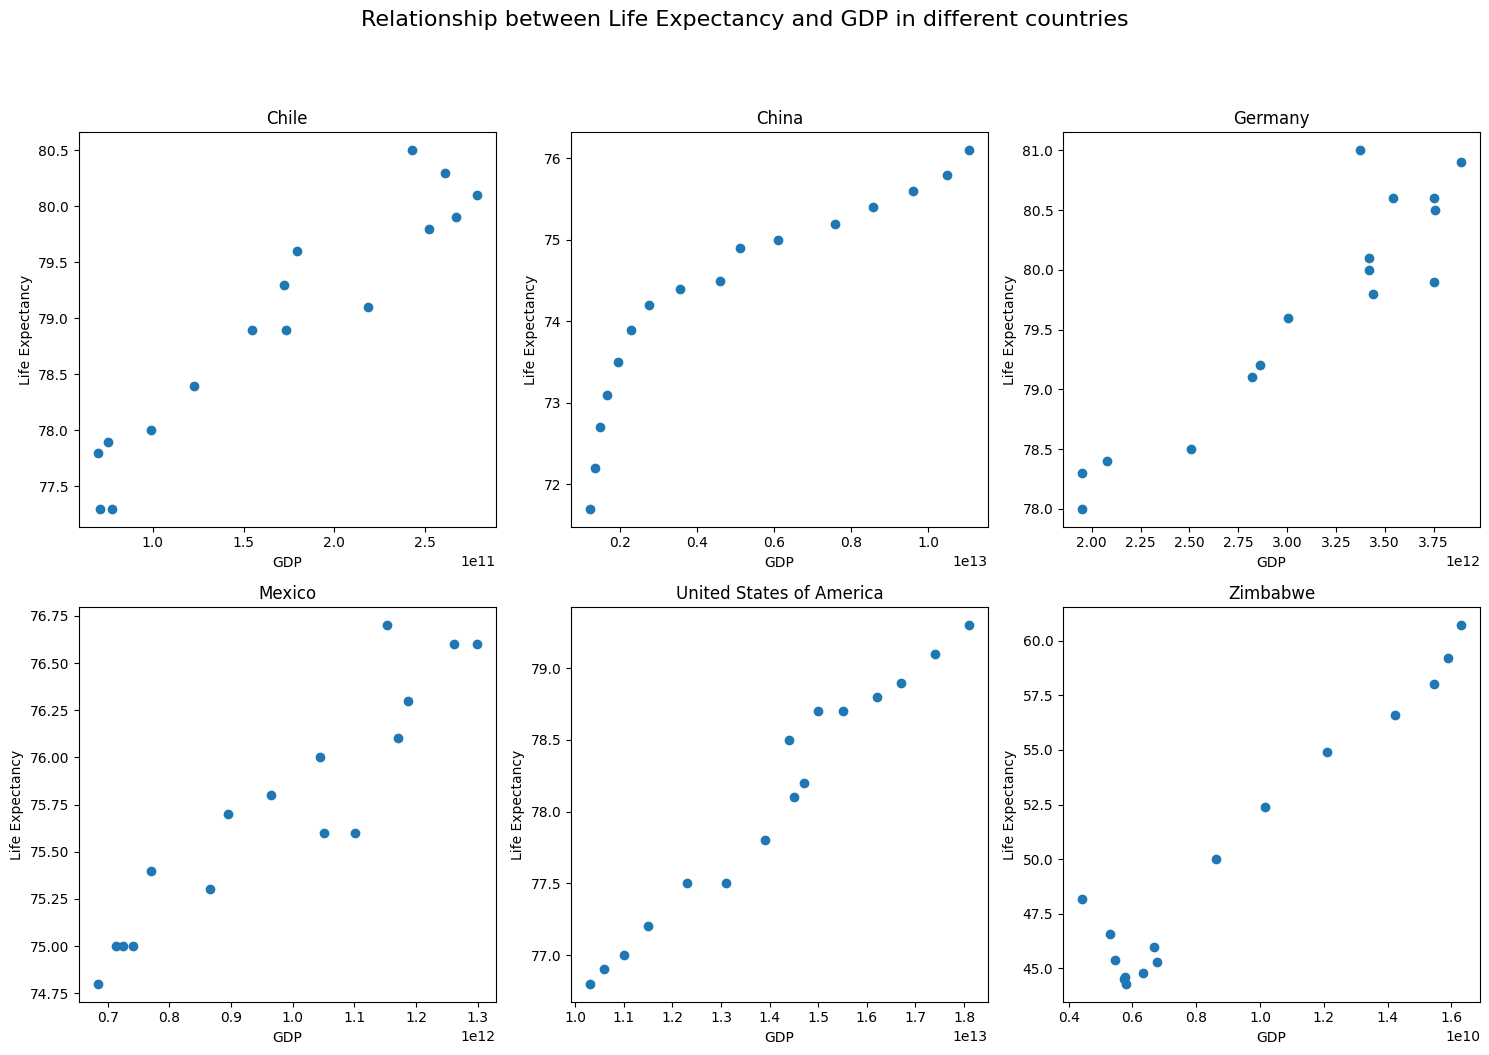

<Figure size 640x480 with 0 Axes>

In [10]:
# Creating dictinonary for countries
countries = {
    "Chile": "",
    "China": "",
    "Germany": "",
    "Mexico": "",
    "United States of America": "",
    "Zimbabwe": ""
}

# Filling dict with data for each country
for key, value in countries.items():
  countries[key] = data[data["Country"] == key]

# Scatter plot for each country
keys_list = list(countries.keys())
c = 0

fig, axs = plt.subplots(2, 3, figsize=(15, 10)) # 'figsize' can be adjusted as needed

for i in range(0, 2):
  for j in range(0, 3):
    axs[i, j].scatter(countries[keys_list[c]]["GDP"],countries[keys_list[c]]["Life expectancy at birth (years)"])
    axs[i, j].set_ylabel("Life Expectancy")
    axs[i, j].set_xlabel("GDP")
    axs[i, j].set_title(keys_list[c])
    c += 1

fig.suptitle('Relationship between Life Expectancy and GDP in different countries', fontsize=16, y=1.05)
plt.tight_layout()
plt.show()
plt.clf()

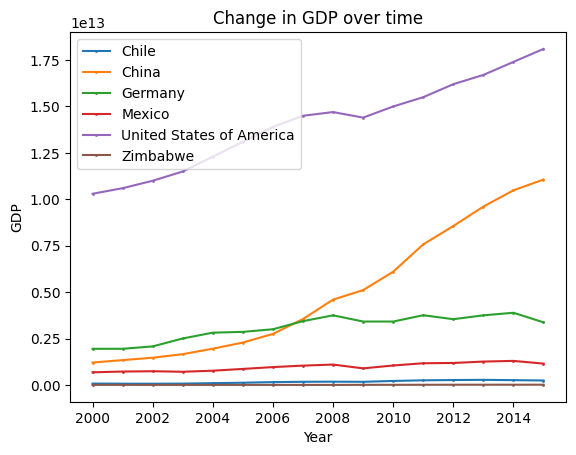

<Figure size 640x480 with 0 Axes>

In [13]:
# Change in GDP in different countires

for key, value in countries.items():
  plt.plot(value["Year"], value["GDP"], marker="o", markersize=1, label=key)


plt.xlabel("Year")
plt.ylabel("GDP")
plt.title("Change in GDP over time")
plt.legend()
plt.show()
plt.clf()


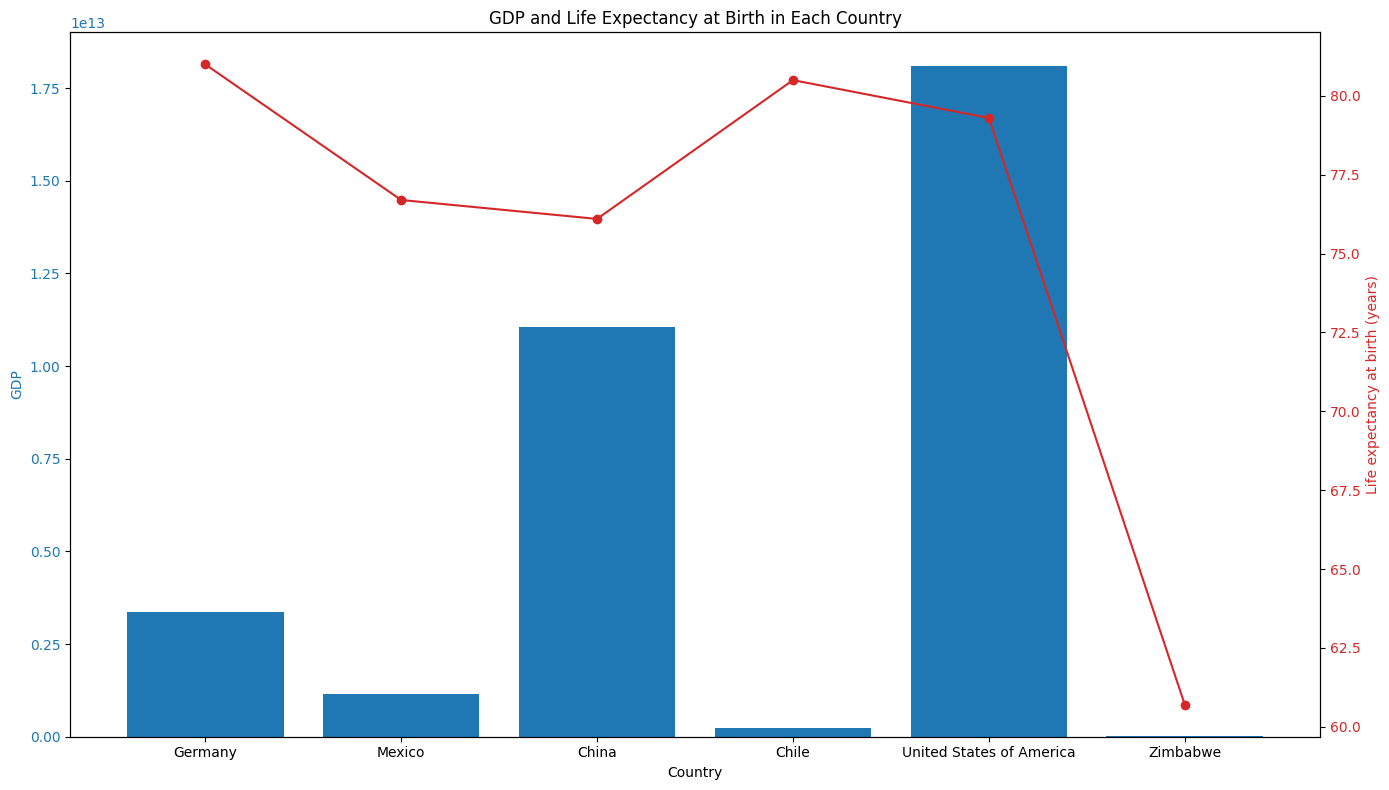

In [14]:
# Barplot according to Life expectancy

# Since we want to make a bar plot according to GDP and life expectancy in each country,
# we'll need to process the data to get the latest year's data for each country.

# Group the data by country and get the latest entry for each one
latest_data = data.sort_values('Year').groupby('Country').tail(1)

# Now let's plot GDP and Life expectancy in a bar plot for each country
# We will create a figure with two y-axes
fig, ax1 = plt.subplots(figsize=(14, 8))

# Create a bar plot for GDP
color = 'tab:blue'
ax1.set_xlabel('Country')
ax1.set_ylabel('GDP', color=color)
ax1.bar(latest_data['Country'], latest_data['GDP'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

# Instantiate a second y-axes that shares the same x-axis
ax2 = ax1.twinx()

# Create a bar plot for life expectancy
color = 'tab:red'
ax2.set_ylabel('Life expectancy at birth (years)', color=color)
ax2.plot(latest_data['Country'], latest_data['Life expectancy at birth (years)'], color=color, marker='o')
ax2.tick_params(axis='y', labelcolor=color)

# Set the title of the plot
plt.title('GDP and Life Expectancy at Birth in Each Country')

# Show the plot with a tight layout
fig.tight_layout()
plt.show()
